In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
station_info_df = pd.read_csv("input/station_info.csv")

In [38]:
station_info_df = (
    station_info_df.rename(columns={
        '지점': 'station',
        '지점명': 'station_name',
        '위도': 'lat',
        '경도': 'lon',
        '노장해발고도(m)': 'elev',
        '기압계(관측장비지상높이(m))': 'pressure_sensor_h',
        '기온계(관측장비지상높이(m))': 'temp_sensor_h',
        '풍속계(관측장비지상높이(m))': 'wind_sensor_h',
        '강우계(관측장비지상높이(m))': 'rain_sensor_h',
    })
)

station_info_df = station_info_df.drop(columns=['시작일', '종료일'])

# Dropping the old 수원 station info(since the dataset is from 2019, and the two 수원 data are very similar.)
if station_info_df.iloc[-1]['elev'] == 34.84:
    station_info_df = station_info_df.iloc[:-1]

station_info_df

,station,station_name,lat,lon,elev,pressure_sensor_h,temp_sensor_h,wind_sensor_h,rain_sensor_h
0,98,동두천,37.9019,127.0607,115.62,116.74,1.7,10.0,1.0
1,99,파주,37.8859,126.7665,30.59,31.99,1.7,10.0,1.0
2,201,강화,37.7074,126.4463,47.84,49.24,1.6,10.0,0.6
3,112,인천,37.4777,126.6249,68.99,70.19,1.6,10.0,1.2
4,203,이천,37.2640,127.4842,80.09,81.59,1.8,10.0,0.6
5,202,양평,37.4886,127.4945,47.26,48.76,1.9,10.0,0.6
6,108,서울,37.5714,126.9658,85.67,86.67,1.5,10.0,0.5
7,119,수원,37.2575,126.9830,39.81,40.81,1.6,18.7,1.1


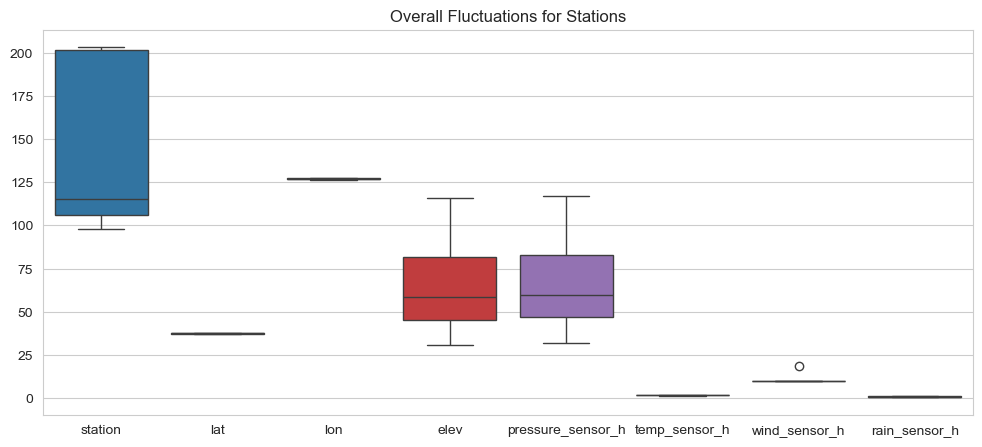

In [39]:
cols = [col for col in station_info_df.columns if col not in ["station_id", "station_name"] ]

plt.figure(figsize=(12, 5))
sns.boxplot(station_info_df[cols])
plt.title("Overall Fluctuations for Stations")
plt.show()

In [40]:
# station_info_df = station_info_df.drop(columns=['station_name', 'lat', 'lon', 'temp_sensor_h', 'wind_sensor_h', 'rain_sensor_h'])
station_info_df = station_info_df[['station', 'elev', 'lat']] # since elev and pressure_sensor_h are highly correlated.

In [41]:
station_info_df

,station,elev,lat
0,98,115.62,37.9019
1,99,30.59,37.8859
2,201,47.84,37.7074
3,112,68.99,37.4777
4,203,80.09,37.2640
5,202,47.26,37.4886
6,108,85.67,37.5714
7,119,39.81,37.2575


In [42]:
station_info_df.to_csv("input/processed/station_info_processed.csv", index=False)